In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(0)

### Cond Independence

In [3]:
x = np.empty((1000, 8))
y = np.concatenate((np.ones(500), np.zeros(500)))
np.random.shuffle(y)

In [4]:
portion = [0.9, 0.8, 0.7, 0.6]

for i in range(len(portion)):
    idx_len = int(int(x.shape[0]) *  portion[i])
    indx = np.random.randint(0, int(x.shape[0]), idx_len)
    x[indx, i] = y[indx]
for j in range(4, 8):
    x[:,j] = np.random.choice([0, 1],x.shape[0])

In [5]:
import itertools
data= np.array(list(itertools.product([0, 1], repeat=4)))
label = np.zeros(data.shape[0])

In [6]:
for i in range(0, data.shape[0]):
    if data[i][0] and (data[i][1] == data[i][2]):
        label[i] = 1

In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(data, label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=['A1', 'A2', 'A3', 'A4'],  class_names=['0', '1'],
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)

In [14]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]
h = .02

In [15]:
classifiers = [
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    LogisticRegression(random_state=0, solver ='lbfgs')]

In [16]:
names = ["Decision Tree", "Naive Bayes",
         "Logistic Regression"]

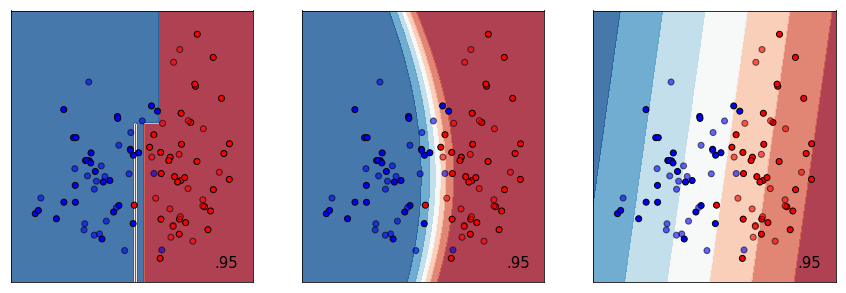

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])


for i in range(0, 3):
    ax[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax[i].set_xlim(xx.min(), xx.max())
    ax[i].set_ylim(yy.min(), yy.max())
    ax[i].set_xticks(())
    ax[i].set_yticks(())

i = 1
for name, clf in zip(names, classifiers):
        ax = plt.subplot(1, len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())

        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

In [ ]:
from lime import submodular_pick
import lime.lime_tabular

In [209]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=['0', '1'], class_names=['0', '1'], verbose=False, mode='regression', discretize_continuous=False)

In [217]:
sp_obj = submodular_pick.SubmodularPick(explainer, X_train, classifiers[0].predict, sample_size=5, num_features=2)

In [218]:
sp_obj.explanations

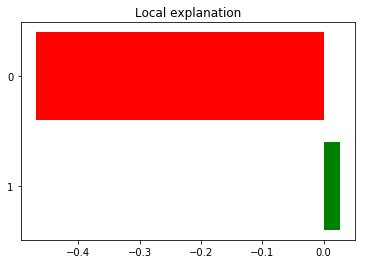

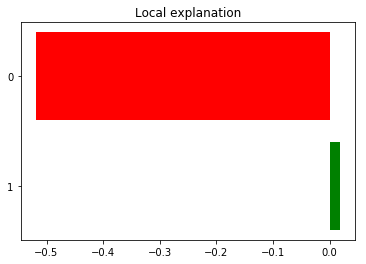

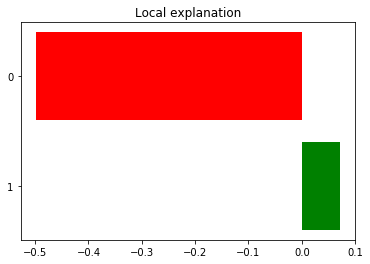

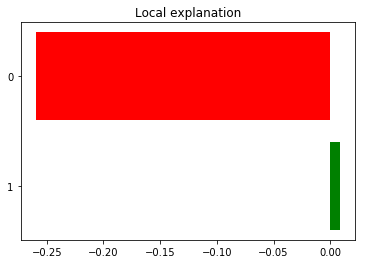

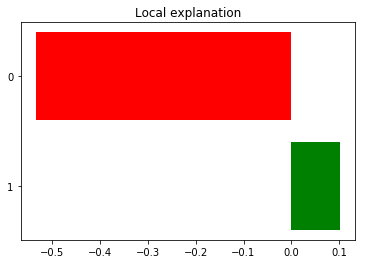

In [219]:
[exp.as_pyplot_figure() for exp in sp_obj.sp_explanations];

In [220]:
import pandas as pd
W=pd.DataFrame([dict(this.as_list()) for this in sp_obj.explanations])

In [221]:
W

,0,1
0,-0.533930,0.101904
1,-0.259655,0.008684
2,-0.498729,0.071833
3,-0.518905,0.018468
4,-0.469468,0.027028
